
========================================================<br>
<br>
   File name   : YOLOv3_YOLOv4_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Modified    : TEAM_7 MinTic DS4 with Transfer Learening Serwers images<br>
   Created date: 2020-09-30<br>
   Modifie date: 2020-10-15<br>
   GitHub      : https://github.com/arracinim/Sewers-Rover<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [3]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Nov 15 01:54:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [2]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
checkpoints		  IMAGES	     README.md
Collect_training_data.py  LICENSE	     requirements.txt
custom_dataset		  log		     tools
deep_sort		  mAP		     train.py
detection_custom.py	  mnist		     yolov3
detection_demo.py	  model_data	     YOLOv3_colab_training.ipynb
detect_mnist.py		  object_tracker.py
evaluate_mAP.py		  __pycache__


**Install all required libraries for our project:**

In [3]:
!pip install -r ./requirements.txt

**Download yolov3.weights if you don't have it:**<br>
This download may take 30 minutes

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [4]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

**Test by loading trained model:**

In [5]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:** <br>
Pre-trained with *COCO DATASET*

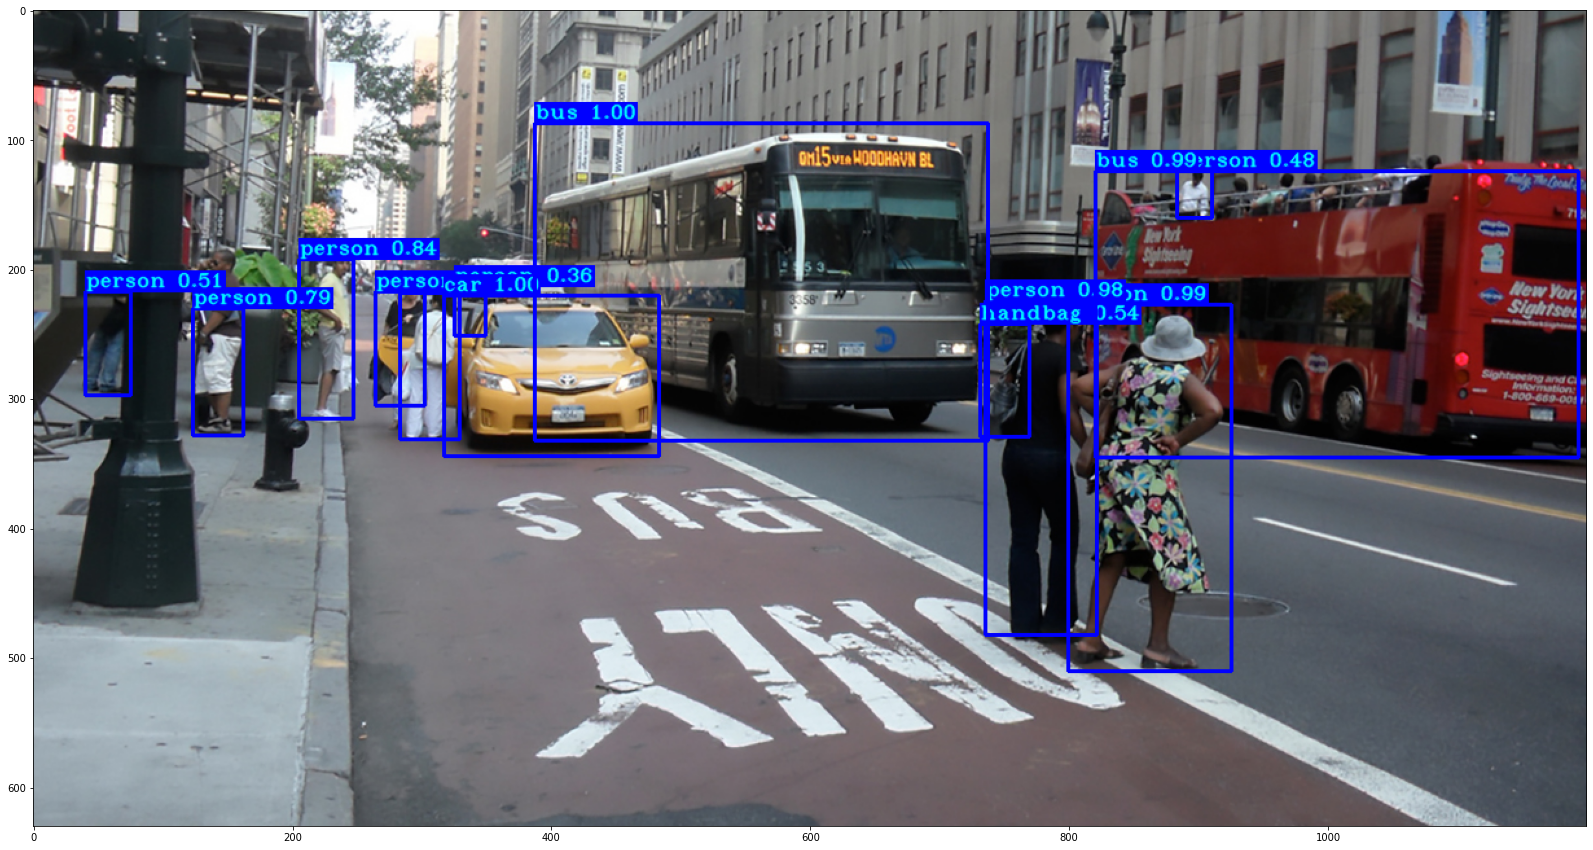

In [5]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)


With the pre-trained weights of **COCO DATA** set it is not possible to detect an anomaly, hole, of the sewer system; in this case it predicts a donut with  probabily of $0.65$.

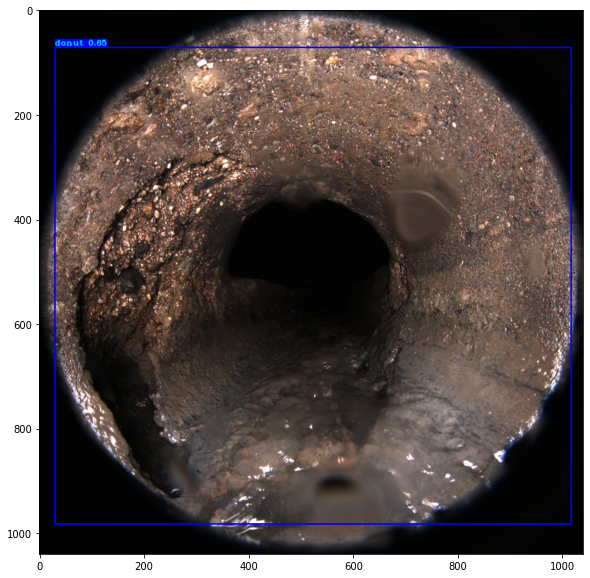

In [7]:
image_path   = "./IMAGES/Front303.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [6]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/Front60_jpg.rf.c0e356c9157be3d29e064e326b4e9f12.jpg 82,33,172,200,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/Front56_jpg.rf.23e36eba8f94f9f892e17e9712c9f856.jpg 125,3,177,208,0 229,2,269,133,0 228,133,297,271,1
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/Front55_jpg.rf.01e078944ebfaa6dfd1d7931f166a362.jpg 31,147,188,305,1
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/Front55_jpg.rf.007156a2d8fa582e24fafa8b2f04fa20.jpg 227,146,287,264,1 217,2,258,142,0 139,5,184,209,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/Front51_jpg.rf.6d86723261aa2333c41a82a4c1d42625.jpg 293,107,351,159,2
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/Front50_jpg.rf.e014d151756f8f441db54d5de85bfa6d.jpg 274,127,320,171,2
/content/gdrive/My Drive/TensorFlow-2.x-YOL

**Start training custom model:**

In [7]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13109164508869792913
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10887077496008809332
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9689865524353701536
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14613293312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18179919188015365882
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]
RuntimeError in tf.config.experimental.list_physical_devices('GPU')
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/9, lr:0.000011, giou_loss:   2.46, conf_loss:1616.72, prob_loss:   5.70, total_loss:

In [8]:
print(YOLO_INPUT_SIZE), print(TRAIN_CLASSES)

416
model_data/license_plate_names.txt


(None, None)

**Create Yolo v3 custom model and load custom trained weights**

In [9]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/RA1.jpg` image**

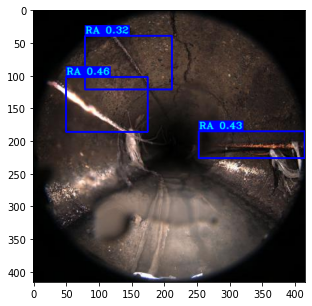

In [10]:
image_path   = "./IMAGES/RA1.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**

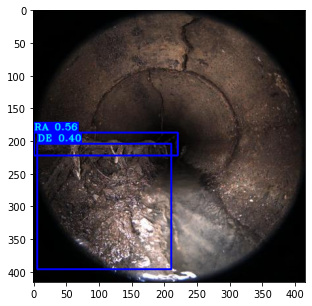

In [27]:
image_path   = "./IMAGES/RA_DE2.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)

* With 30 epochs an acceptable result is achieved in the evaluation data; It should be noted that in this illustrative exercise only approximately 120 images distributed in training, validation and evaluation were used; in which the transfer process lasted 15 minutes with the GPU provided by *COLAB**. <br>

* In the original exercise, a virtual team with TESLA K80 - CUDA GPU and Linux operating system (ubuntu 18.04) was used for the work; the data had approximately 8000 tagged images and 100 epochs with a result that generalized over all the tests performed (see application and GitHup). The training time for freezing the convolutional layers that already had the general characteristics of the COCO DATASET was 12.5 hours.